## KCB 결제 및 신용 데이터 분석

In [123]:
# 모듈 import
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [3]:
# 디렉토리 변경
os.chdir(r'C:\Users\Park\Desktop\프로젝트')

In [23]:
# 카드데이터
df = pd.read_csv('jeju_financial_life_data .csv')
#처음 csv 읽어 올 때는 인코딩 따로 주지 말고 읽어볼 것 .
#오류 발생 시 여러 채널로 파일 전송하는 과정에서 훼손되었을 수 있기 때문에 되도록 원 제공자에게 받을 것.

In [24]:
df.head(5)

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [25]:
df.columns

Index(['zip_cd', 'year_month', 'x_axis', 'y_axis', 'sex', 'age', 'job_majorc',
       'job_smallc', 'job_public', 'job_profession', 'job_self', 'job_none',
       'job_other', 'avg_income', 'med_income', 'avg_spend',
       'avg_foreign_spend', 'avg_debt', 'avg_debt_credit', 'avg_debt_noneb',
       'avg_debt_mortgage', 'avg_debt_deposit', 'avg_debt_collateral',
       'avg_credit_rat', 'medium_resid_rat', 'large_resid_rat',
       'vehicle_own_rat'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10422 entries, 0 to 10421
Data columns (total 27 columns):
zip_cd                 10422 non-null int64
year_month             10422 non-null int64
x_axis                 10422 non-null float64
y_axis                 10422 non-null float64
sex                    10422 non-null int64
age                    10422 non-null int64
job_majorc             10422 non-null float64
job_smallc             10422 non-null float64
job_public             10422 non-null float64
job_profession         10422 non-null float64
job_self               10422 non-null float64
job_none               10422 non-null float64
job_other              10422 non-null float64
avg_income             10422 non-null int64
med_income             10422 non-null int64
avg_spend              10422 non-null int64
avg_foreign_spend      10422 non-null int64
avg_debt               10422 non-null int64
avg_debt_credit        10422 non-null int64
avg_debt_noneb         10422 non-null

credit_card_data.csv 안에는 전체 집단을 두가지 기준으로 분류한 데이터가 섞여 있었다.
<br>이를 두 개의 DataFrame으로 분리 하였다.

* 성별 정보만 있는 row들

In [8]:
df_s=df[(df.sex == '남자') | (df.sex=='여자')]

* 지역정보가 포함된 row들

In [9]:
df_r = df[-((df.sex == '남자') | (df.sex=='여자'))]

In [10]:
df_r.population.sum()

1090371000

#### 지역 및 연령에 의해 나눠집 집단(df_r)을 분석하기로 결정하였다.


In [11]:
#성별 정보는 필요없으니까 drop한다
df_r = df_r.drop(columns=['sex'])

In [12]:
# 결측치 없음 
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3839
Data columns (total 25 columns):
pop_cd                              3456 non-null object
year                                3456 non-null int64
month                               3456 non-null int64
avg_score                           3456 non-null int64
avg_rat                             3456 non-null int64
city                                3456 non-null object
ages                                3456 non-null object
population                          3456 non-null int64
num_opencard                        3456 non-null float64
num_usecard                         3456 non-null float64
monthly_card_spend                  3456 non-null int64
monthly_lc                          3456 non-null int64
monthly_loan                        3456 non-null int64
monthly_bk_loan                     3456 non-null int64
monthly_cd_loan                     3456 non-null int64
monthly_installments_loan           3456 non-n

* df_r: (16개 시도) * (16.01~17.12 = 24개월) * (10대 부터 90대까지 9개 구간) = 3456

# --------잠시 보류------------------

In [13]:
# 전 기간 다 더하면 144개 구분.(시간으로 그룹바이 )
# 연령대별로 2년간 월별 추이가 다른지 아닌지 확인

# 서울 거주 30대 월 카드사용총액
df_s30=df_r[(df_r.ages == '30대') & (df_r.city == '서울')]

df_s30.shape

#시각화 lib
import seaborn as sns

df_s30.monthly_card_spend

sns.barplot(df_s30.index,df_s30.value)

# ------------------------------------

### 지역별 대출 데이터 시각화 

* 5개(bk,cd,installment,insurance,sbk) 분류 시각화 도출

month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: monthly_loan, dtype: object

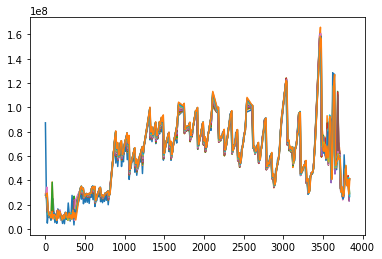

In [14]:
# 년 월 별로 그룹화 진행 
dfloan=df_r.groupby(['month'])['monthly_loan'] 
dfloan.plot()

ages
10대    AxesSubplot(0.125,0.125;0.775x0.755)
20대    AxesSubplot(0.125,0.125;0.775x0.755)
30대    AxesSubplot(0.125,0.125;0.775x0.755)
40대    AxesSubplot(0.125,0.125;0.775x0.755)
50대    AxesSubplot(0.125,0.125;0.775x0.755)
60대    AxesSubplot(0.125,0.125;0.775x0.755)
70대    AxesSubplot(0.125,0.125;0.775x0.755)
80대    AxesSubplot(0.125,0.125;0.775x0.755)
90대    AxesSubplot(0.125,0.125;0.775x0.755)
Name: monthly_loan, dtype: object

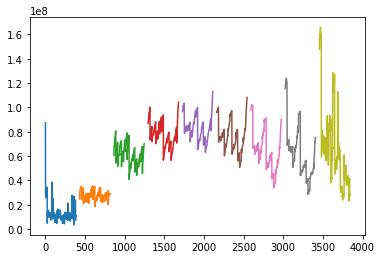

In [15]:
df_age-=df_r.groupby(['ages'])['monthly_loan'] 
df_credit.plot()

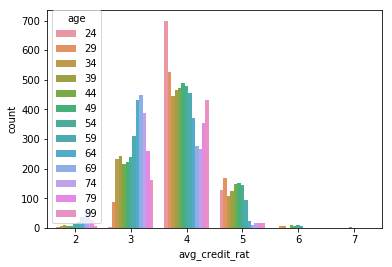

In [29]:
sns.countplot(data=df, x ='avg_credit_rat', hue = 'age')
plt.show()

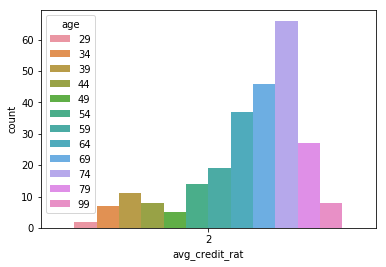

In [30]:
df1 = df.loc[df.avg_credit_rat==2,:]
df1.shape

sns.countplot(data=df1, x ='avg_credit_rat', hue = 'age')
plt.show()


## 소득대비 소비정도와 신용도간의 관계

In [119]:
import numpy as np
df_spending = df[['avg_income','avg_spend']]
#print(df['avg_income'])
df['asd'] = (((df['avg_spend']/3) /((df['avg_income']/12)+1)) ).to_frame()
#asd.set_index(['asdg'])
df
df_credit = df[['asd','avg_credit_rat']]
df_credit['asd'].max()

1207923.3333333333

In [143]:
#plt.scatter(df['asd'],df['avg_credit_rat'])
#plt.show()
plt(formula = 'asd' ~ 'avg_credit_rat',
     data = data,
     col = alpha(c("blue", "green"), 0.8)[data$genre],
     xlab = "소득대비 소비정도",
     ylab = "신용도",
     main = "분석")



SyntaxError: invalid syntax (<ipython-input-143-40016b08d633>, line 3)

In [162]:
avg_credit_rat = sm.ols(formula = 'avg_credit_rat~asd+vehicle_own_rat+avg_debt_credit+avg_debt_noneb+avg_debt_mortgage+avg_debt_deposit+avg_debt_collateral', data = df).fit()

In [163]:
avg_credit_rat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_credit_rat   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     80.77
Date:                Mon, 05 Aug 2019   Prob (F-statistic):          1.01e-114
Time:                        12:19:32   Log-Likelihood:                -10688.
No. Observations:               10422   AIC:                         2.139e+04
Df Residuals:                   10414   BIC:                         2.145e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8067      0.013    301.059      0.000       3.782       3.832
asd                  2.754e-07   2.63e-07      1.048      0.295    -2.4e-07     7.9e-07
vehicle_own_rat         3.0597      0.148     20.669      0.000       2.770       3.350
avg_debt_credit     -6.182e-09   5.18e-10    -11.924      0.000    -7.2e-09   -5.17e-09
avg_debt_noneb      -2.142e-10   9.78e-11     -2.189      0.029   -4.06e-10   -2.24e-11
avg_debt_mortgage    1.183e-11   7.17e-11      0.165      0.869   -1.29e-10    1.52e-10
avg_debt_deposit    -9.039e-10   2.43e-10     -3.721      0.000   -1.38e-09   -4.28e-10
avg_debt_collateral -1.706e-10   4.94e-11     -3.451      0.001   -2.68e-10   -7.37e-11
==============================================================================
Omnibus:                       30.573   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.234
Skew:                           0.041   Prob(JB):                     4.98e-09
Kurtosis:                       3.285   Cond. No.                     5.77e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


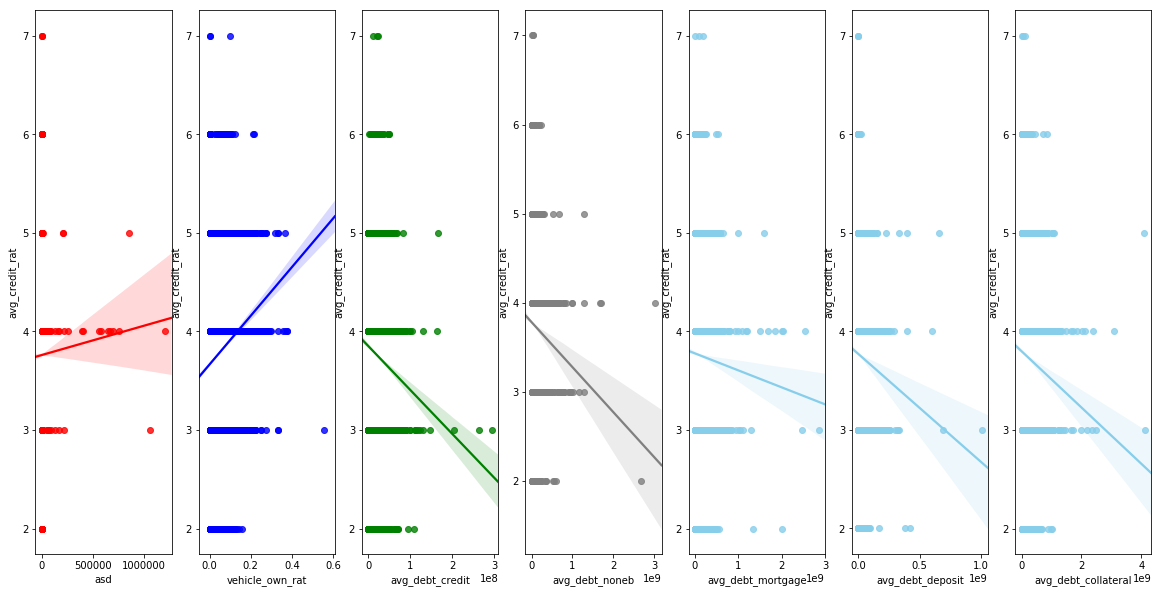

In [164]:
plt.figure(figsize=(20,10))
plt.subplot(1, 7, 1)   # 1 x 3 그래프 배열에서 첫 번째 그래프
sns.regplot('asd', 'avg_credit_rat', df, color='red')
plt.subplot(1, 7, 2)   # 1 x 3 그래프 배열에서 두 번째 그래프
sns.regplot('vehicle_own_rat', 'avg_credit_rat', df, color='blue')
plt.subplot(1, 7, 3)   # 1 x 3 그래프 배열에서 세 번째 그래프
sns.regplot('avg_debt_credit', 'avg_credit_rat', df, color='green')
plt.subplot(1, 7, 4)   # 1 x 3 그래프 배열에서 두 번째 그래프
sns.regplot('avg_debt_noneb', 'avg_credit_rat', df, color='gray')
plt.subplot(1, 7, 5)   # 1 x 3 그래프 배열에서 세 번째 그래프
sns.regplot('avg_debt_mortgage', 'avg_credit_rat', df, color='skyblue')
plt.subplot(1, 7, 6)   # 1 x 3 그래프 배열에서 세 번째 그래프
sns.regplot('avg_debt_deposit', 'avg_credit_rat', df, color='skyblue')
plt.subplot(1, 7, 7)   # 1 x 3 그래프 배열에서 세 번째 그래프
sns.regplot('avg_debt_collateral', 'avg_credit_rat', df, color='skyblue')

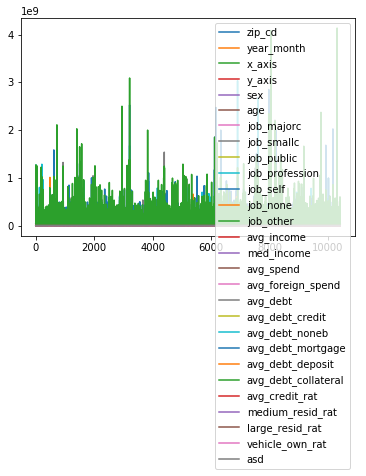

In [158]:
df.plot()

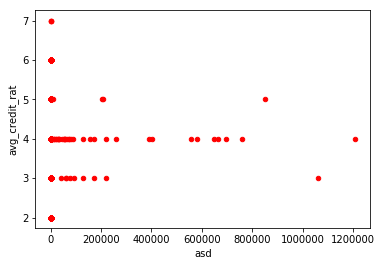

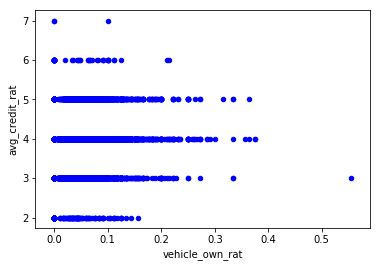

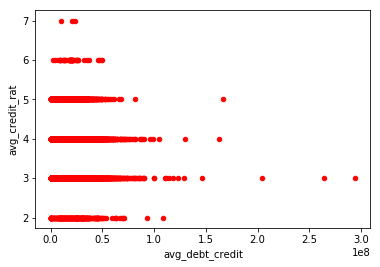

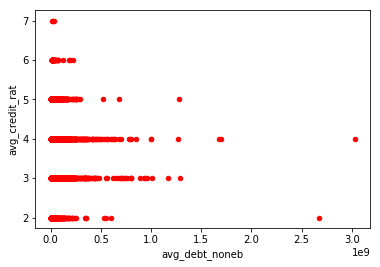

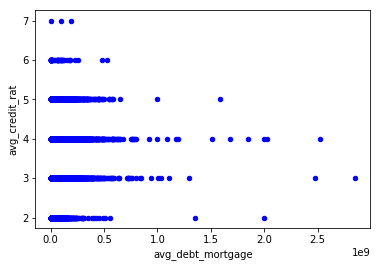

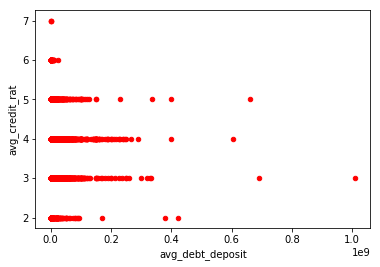

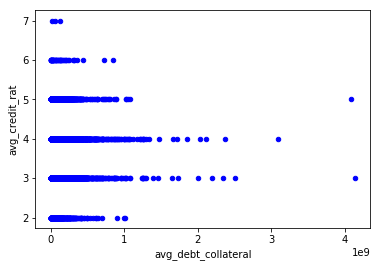

In [166]:
df.plot('asd', 'avg_credit_rat', kind='scatter',color='red')
df.plot('vehicle_own_rat', 'avg_credit_rat', kind='scatter',color='blue')

df.plot('avg_debt_credit', 'avg_credit_rat', kind='scatter',color='red')
df.plot('avg_debt_noneb', 'avg_credit_rat', kind='scatter',color='red')
df.plot('avg_debt_mortgage', 'avg_credit_rat', kind='scatter',color='blue')
df.plot('avg_debt_deposit', 'avg_credit_rat', kind='scatter',color='red')
df.plot('avg_debt_collateral', 'avg_credit_rat', kind='scatter',color='blue')

## 예측(scikit-learn)

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
model = LinearRegression()

In [174]:
x = df[['asd', 'avg_debt_credit', 'avg_debt_collateral']]  # 학습 자료
y = df['avg_credit_rat']  # 정답 자료

In [175]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
asd = 2.54
avg_debt_credit = 51619322

avg_debt_collateral = 20

personA = [asd, avg_debt_credit, avg_debt_collateral]

avg_credit_ratA = model.predict([personA])

avg_credit_ratA

array([3.66941911])

In [137]:
avg_credit_rat.rsquared

0.1448524691627342

In [139]:
print('predicted values',avg_credit_rat.predict())

predicted values [31707471.99734558 30630729.51919199 33291880.34714907 ...
 41847398.60068525 33992279.93475315 39282687.97910847]


zip_cd                -0.070226
year_month                  NaN
x_axis                -0.019969
y_axis                 0.084094
sex                   -0.182243
age                   -0.551662
job_majorc             0.360172
job_smallc             1.000000
job_public             0.340813
job_profession         0.170032
job_self              -0.331382
job_none              -0.512313
job_other              0.317125
avg_income             0.184996
med_income             0.344991
avg_spend              0.465512
avg_foreign_spend      0.218155
avg_debt              -0.046983
avg_debt_credit        0.141469
avg_debt_noneb        -0.021964
avg_debt_mortgage      0.131146
avg_debt_deposit       0.050624
avg_debt_collateral    0.012769
avg_credit_rat         0.238913
medium_resid_rat       0.058610
large_resid_rat        0.058610
vehicle_own_rat        0.393297
asd                   -0.048670
dtype: float64

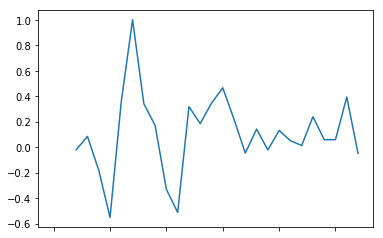

In [197]:
corr_with_rat = df.corrwith(df['job_smallc'])
corr_with_rat.plot()
corr_with_rat

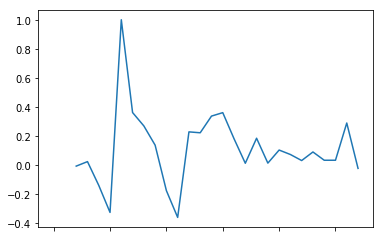

In [195]:
corr_with_rat1 = df.corrwith(df['job_majorc'])
corr_with_rat1.plot()
corr_with_rat1

zip_cd                -0.054004
year_month                  NaN
x_axis                 0.009865
y_axis                 0.078549
sex                   -0.297293
age                   -0.292662
job_majorc             0.267912
job_smallc             0.340813
job_public             1.000000
job_profession         0.114204
job_self              -0.157513
job_none              -0.401123
job_other              0.216307
avg_income             0.275508
med_income             0.408461
avg_spend              0.371575
avg_foreign_spend      0.150215
avg_debt               0.039940
avg_debt_credit        0.259143
avg_debt_noneb         0.019537
avg_debt_mortgage      0.120065
avg_debt_deposit       0.087987
avg_debt_collateral    0.054250
avg_credit_rat         0.025437
medium_resid_rat       0.102183
large_resid_rat        0.102183
vehicle_own_rat        0.264840
asd                   -0.028784
dtype: float64

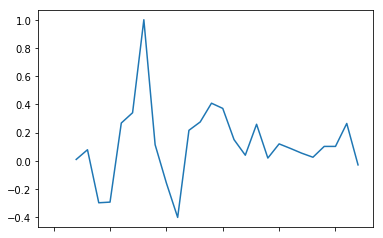

In [199]:
corr_with_rat2 = df.corrwith(df['job_public'])
corr_with_rat2.plot()
corr_with_rat2

zip_cd                -0.037185
year_month                  NaN
x_axis                 0.005621
y_axis                 0.039195
sex                    0.151580
age                   -0.292244
job_majorc             0.135344
job_smallc             0.170032
job_public             0.114204
job_profession         1.000000
job_self              -0.230065
job_none              -0.146646
job_other              0.262331
avg_income             0.050516
med_income             0.088401
avg_spend              0.241607
avg_foreign_spend      0.144176
avg_debt              -0.038606
avg_debt_credit        0.057566
avg_debt_noneb        -0.002962
avg_debt_mortgage      0.050501
avg_debt_deposit       0.027953
avg_debt_collateral   -0.003819
avg_credit_rat        -0.042202
medium_resid_rat       0.064685
large_resid_rat        0.064685
vehicle_own_rat        0.067137
asd                   -0.022248
dtype: float64

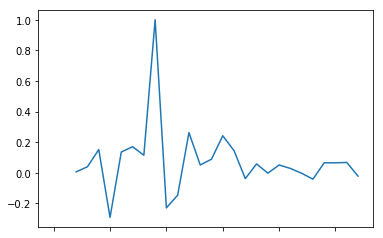

In [201]:
corr_with_rat3 = df.corrwith(df['job_profession'])
corr_with_rat3.plot()
corr_with_rat3

zip_cd                 0.229629
year_month                  NaN
x_axis                 0.028982
y_axis                -0.273272
sex                   -0.218993
age                    0.533631
job_majorc            -0.178204
job_smallc            -0.331382
job_public            -0.157513
job_profession        -0.230065
job_self               1.000000
job_none              -0.524258
job_other             -0.242204
avg_income             0.285560
med_income             0.182810
avg_spend             -0.096452
avg_foreign_spend     -0.140939
avg_debt               0.305587
avg_debt_credit        0.286584
avg_debt_noneb         0.122515
avg_debt_mortgage      0.105164
avg_debt_deposit       0.060227
avg_debt_collateral    0.212544
avg_credit_rat        -0.130612
medium_resid_rat      -0.189639
large_resid_rat       -0.189639
vehicle_own_rat        0.006231
asd                   -0.042657
dtype: float64

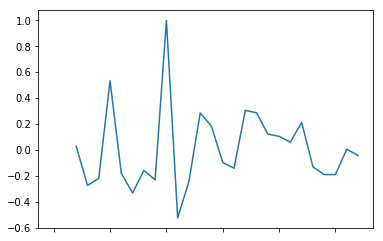

In [204]:
corr_with_rat4 = df.corrwith(df['job_self'])
corr_with_rat4.plot()
corr_with_rat4

zip_cd                -0.120077
year_month                  NaN
x_axis                -0.014594
y_axis                 0.143731
sex                    0.338727
age                    0.095595
job_majorc            -0.362915
job_smallc            -0.512313
job_public            -0.401123
job_profession        -0.146646
job_self              -0.524258
job_none               1.000000
job_other             -0.336632
avg_income            -0.497262
med_income            -0.574243
avg_spend             -0.453915
avg_foreign_spend     -0.135214
avg_debt              -0.242984
avg_debt_credit       -0.461309
avg_debt_noneb        -0.102495
avg_debt_mortgage     -0.245286
avg_debt_deposit      -0.129994
avg_debt_collateral   -0.215384
avg_credit_rat        -0.023158
medium_resid_rat       0.069424
large_resid_rat        0.069424
vehicle_own_rat       -0.397670
asd                    0.086954
dtype: float64

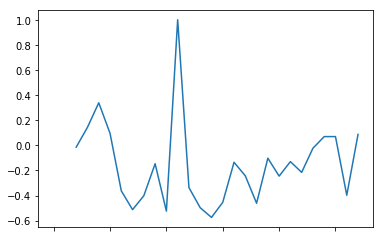

In [205]:
corr_with_rat5 = df.corrwith(df['job_none'])
corr_with_rat5.plot()
corr_with_rat5

zip_cd                -0.069690
year_month                  NaN
x_axis                -0.003460
y_axis                 0.078611
sex                    0.108009
age                   -0.348627
job_majorc             0.226917
job_smallc             0.317125
job_public             0.216307
job_profession         0.262331
job_self              -0.242204
job_none              -0.336632
job_other              1.000000
avg_income             0.148021
med_income             0.232000
avg_spend              0.389264
avg_foreign_spend      0.202218
avg_debt              -0.007882
avg_debt_credit        0.135584
avg_debt_noneb         0.008967
avg_debt_mortgage      0.115384
avg_debt_deposit       0.051601
avg_debt_collateral    0.026956
avg_credit_rat        -0.050375
medium_resid_rat       0.099967
large_resid_rat        0.099967
vehicle_own_rat        0.210030
asd                   -0.035752
dtype: float64

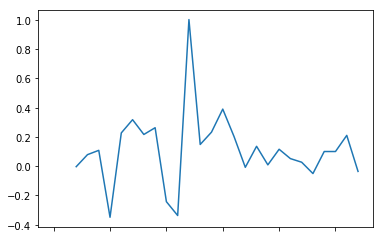

In [207]:
corr_with_rat6 = df.corrwith(df['job_other'])
corr_with_rat6.plot()
corr_with_rat6

zip_cd                 0.027270
year_month                  NaN
x_axis                -0.025330
y_axis                -0.091241
sex                   -0.373259
age                    0.009796
job_majorc             0.220639
job_smallc             0.184996
job_public             0.275508
job_profession         0.050516
job_self               0.285560
job_none              -0.497262
job_other              0.148021
avg_income             1.000000
med_income             0.767186
avg_spend              0.380595
avg_foreign_spend      0.154291
avg_debt               0.405909
avg_debt_credit        0.474098
avg_debt_noneb         0.188334
avg_debt_mortgage      0.249317
avg_debt_deposit       0.168499
avg_debt_collateral    0.306903
avg_credit_rat        -0.063876
medium_resid_rat       0.010262
large_resid_rat        0.010262
vehicle_own_rat        0.278730
asd                   -0.103526
dtype: float64

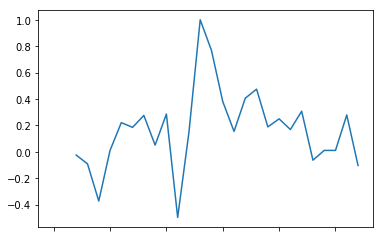

In [208]:
corr_with_rat7 = df.corrwith(df['avg_income'])
corr_with_rat7.plot()
corr_with_rat7

## <제주도 신용 및 결제 데이터>
### -군집화를 통한 안정성 분석

In [ ]:
dfjj=pd.read_csv('jeju_financial_life_data .csv')

In [ ]:
dfjj.columns

In [ ]:
# 시간이 무의미하므로 연월데이터를 없앤다.
dfjj = dfjj.drop(columns=['year_month'])

In [ ]:
#결측치 파악
dfjj.info() 
#결측치 없음

In [ ]:
# 사이즈 확인 
dfjj.shape # 27개 칼럼.

#### 안정성 지표로서 <u>가계수지지표</u>를 사용한다. 
#### dataframe 중 avg_income / avg_spend를 이용한다. 

In [ ]:
dfjj[dfjj.large_resid_rat == -999999].shape
# 주거비율 -999999인 row 는 7873

### Folium 을 사용하여 지도위에 Mark하기 : <br>최종적으로 특정 조건에 맞는 count를 시각화 할 수 있도록 함.
* MarkerCluster를 이용하여 cluster안의 값들을 count한다. 

In [ ]:
import folium 
from folium.plugins import MarkerCluster

#test용으로 1행의 정보를 찍어본다.
m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)

for i in range(0,1000):
    folium.Marker(
        location=[dfjj.y_axis[i],dfjj.x_axis[i]],
        popup='BAE JUNHA ZZANG!',
        icon=folium.Icon(color='blue',icon='circle')
        
    ).add_to(m)

m.save('testmap.html')

#### MARKER CLUSTER

* marker cluster의 동작을 확인한다.

m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)

marker_cluster = MarkerCluster().add_to(m)

for i in range(0,1000):
    folium.Marker(
        location=[dfjj.y_axis[i],dfjj.x_axis[i]],
        popup='cluster test',
        icon=folium.Icon(color='blue',icon='circle')
        
    ).add_to(marker_cluster)

m.save('testmap.html')

가계수지지표(Household Income Index,이하 hii)는 <br>가계의 안정성을 간략히 보여주는 지표로서, <br> 1보다 큰 경우 수입보다 지출이 큰 경우 적자상태로 볼 수 있다.<br><br>그러므로 [hii > 1] 인 인구의 도수를 파악하고 이를 지역 별로 비교하는 것이 유의미 할 것으로 판단하였다.

### hii가 1이상으로 위험군으로 분류 될 수 있는 인구의 도수를 지도상에 시각화한다.
#### 코드 작성 순서 
1. dfjj에서 [avg_income / avg_spend >1] 인 행을 조건부 슬라이싱하여 reframing후 dfhii로 저장한다. 
2. dfhii의 행들을 지도상에 clustering하여 시각화 한다.

dfhii = dfjj[(dfjj.avg_spend / (dfjj.avg_income + 1 )) > 1 ].copy()
# income이 0인 경우를 대비하여 분모에 1을 더한다.

len(dfhii.index)
dfhii.shape

dfhii.head(5)

In [ ]:
#Map 객체 만들기
'''m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)

marker_cluster = MarkerCluster().add_to(m)

for i in range(0,len(dfhii.index)-1):
    folium.Marker(
        location=[dfhii.iloc[i,2],dfhii.iloc[i,1]],
        popup='Household Index is {}',#.format((dfhii.iloc[i,14] / dfhii.iloc[i,12]+1)),
        icon=folium.Icon(color='red',icon='angry')
        
    ).add_to(marker_cluster)
m.save('hiimap.html') '''


m

### Clustering 말고 그냥 marker로 색깔만 달리해서 지도위에 점찍기 <br>가계수지지표 수준별 분포도 
* 기준:<br> 0~0.4 = 저위험 ->Blue<br>0.4~0.7 = 중위험 ->Green<br>0.7~1.0 = 고위험 ->Yellow<br>1 > in danger ->Red

In [ ]:
# 지도를 표시를 위한 DataFrame.
dfm=dfjj.loc[:,['x_axis','y_axis','avg_income','avg_spend']]


In [ ]:
# 위험도 구분하여 데이터프레임 분리.
hi = dfm.avg_spend / (dfm.avg_income + 1 )
dfred = dfm[(dfm.avg_spend / (dfm.avg_income + 1 )) > 1 ].copy()
dfyellow = dfm[(hi <= 1) & (hi >= 0.8) ].copy()
dfgreen = dfm[(hi >= 0.4) & (hi < 0.8) ].copy()
dfblue = dfm[(dfm.avg_spend / (dfm.avg_income + 1 )) < 0.4 ].copy()

In [ ]:
print(len(dfred.index))
print(len(dfyellow.index))
print(len(dfgreen.index))
print(len(dfblue.index))
dfred.head(5)

* map에 점.찍.기

In [ ]:
m = folium.Map(
    location=[33.362134,126.533345], #한라산 백록담
    zoom_start=10.5
)
# red 추가
for i in range(0,len(dfred.index)-1):
    folium.Marker(
        location=[dfred.iloc[i,1],dfred.iloc[i,0]] ,
        popup='in Danger',
        icon=folium.Icon(color='red',icon='circle')
        
    ).add_to(m)
    
#m.save('pointmap.html')

In [ ]:
# # yellow 추가 -- counts가 0임
# for i in range(0,len(dfred.index)-1):
#     folium.Marker(
#         location=[dfyellow.iloc[i,1],dfyellow.iloc[i,0]] ,
#         popup='High Risk',
#         icon=folium.Icon(color='yellow',icon='circle')
        
#     ).add_to(m)
    
# #m.save('pointmap.html')

In [ ]:
# green 추가 
for i in range(0,len(dfgreen.index)-1):
    folium.Marker(
        location=[dfgreen.iloc[i,1],dfgreen.iloc[i,0]] ,
        popup='Good',
        icon=folium.Icon(color='green',icon='circle')
        
    ).add_to(m)
    
#m.save('pointmap.html')

# blue 추가 - clustering
marker_cluster = MarkerCluster().add_to(m)

for i in range(0,len(dfblue.index)-1):
    if i%10 == 0:
        folium.Marker(
            location=[dfblue.iloc[i,1],dfblue.iloc[i,0]] ,
            popup='Great',
            icon=folium.Icon(color='blue',icon='circle')

        ).add_to(marker_cluster)
    
m.save('pointmap.html')

### map 출력
m

In [ ]:
# blue 추가
marker_cluster = MarkerCluster().add_to(m)

for i in range(0,len(dfblue.index)-1):
    if i%50 == 0:
        folium.Marker(
            location=[dfblue.iloc[i,1],dfblue.iloc[i,0]] ,
            popup='Great',
            icon=folium.Icon(color='blue',icon='circle')

        ).add_to(m)
    
m.save('pointmap.html')

In [ ]:
m